In [2]:
import pandas as pd
import numpy as np
from glob import glob
import sys
sys.path += ["../src"]
import jl_vae
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots as sbp
from sklearn.preprocessing import StandardScaler



In [8]:
#wsd = pd.read_csv('/data/housing/data/intermediate/jl_pop_synth/Sliced_WD_all_prov.txt').rename(columns = {"index": "method", "province": "prov", "Wasserstein distance": "distance"})
wsd = pd.read_csv("/data/housing/data/intermediate/jl_pop_synth/wasserstein_isp_250825.csv", index_col = 0)
wsd = wsd[[u for u in wsd.columns if "95" not in u]]
wsd.index.name = None

In [ ]:
#df_wsd = wsd.set_index(["method", "prov"]).unstack().apply(lambda x: (x - x.mean()) / x.std()).drop(["nfvae_vs_null"])

In [9]:
wsd.to_csv(f"/data/housing/data/intermediate/jl_pop_synth/similarity_wasserstein_geo_isp.csv")
df_wsd = pd.read_csv(f"/data/housing/data/intermediate/jl_pop_synth/similarity_wasserstein_geo_isp.csv", index_col = 0)
df_wsd = wsd.apply(lambda x: (x - x.mean()) / x.std(), axis = 1)

In [24]:
#df_wsd["distance"].T.mean().sort_values()
df_wsd.mean().sort_values()

df_real                    -1.181580
df_copula_nf               -0.871695
df_nfvae                   -0.517142
df_shuffle_cap_num         -0.414226
df_shuffle_cap_bins        -0.410148
df_copula_ablation         -0.094783
df_ablation                 1.056524
df_shuffle_province_num     1.215387
df_shuffle_province_bins    1.217663
dtype: float64

<Axes: ylabel='prov'>

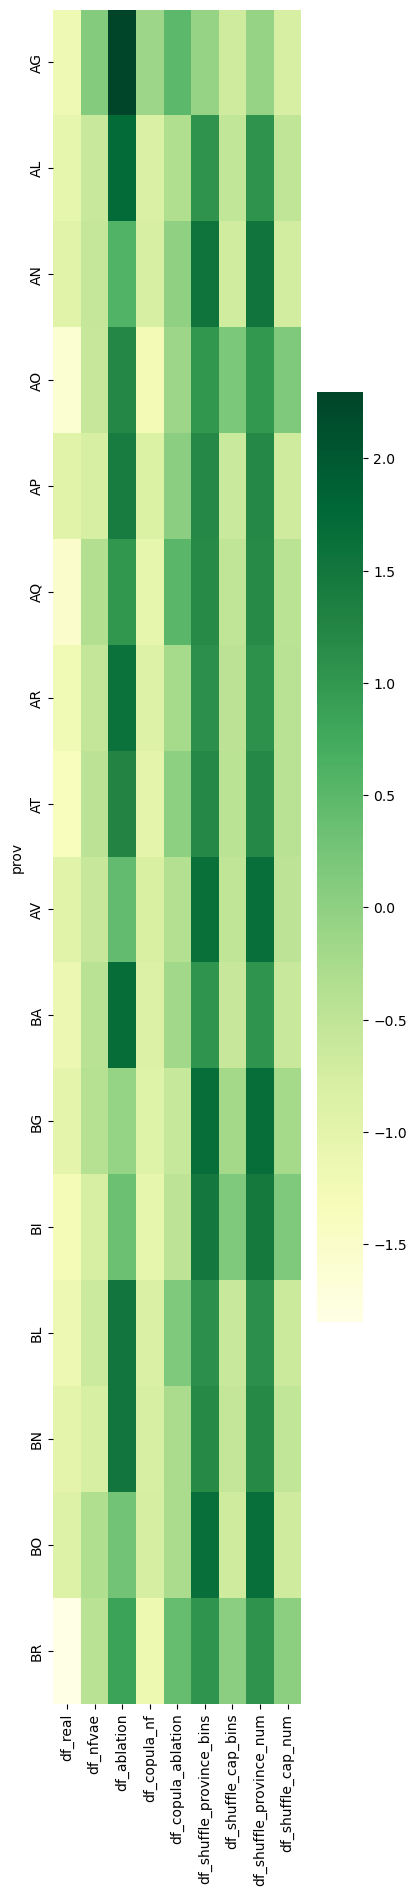

In [17]:
fig, axes = sbp(figsize = (4,22))

#sns.heatmap(df_wsd["distance"].T, cmap = "YlGn")
sns.heatmap(df_wsd, cmap = "YlGn")

<Axes: xlabel='distance', ylabel='method'>

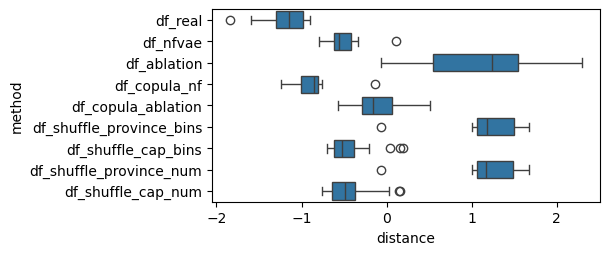

In [19]:
fig, axes = sbp(figsize = (5, 2.5))

sns.boxplot(data = df_wsd.stack().reset_index().rename(columns = {"level_1": "method", 0: "distance"}), y = "method", x = "distance")